# <center><u> Exploratory Data Analysis On Cars</u> </center>

**Importing the necessary libraries**

In [105]:
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px
import os

In [106]:
pwd = os.getcwd()

In [107]:
# import the csv file 
data_import = pd.read_csv(pwd+ "./data.csv")
data_import.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [108]:
# Get the datatypes
data_import.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [109]:
# creating a copy to begin with
data = data_import.copy()

**Dropping irrevalent columns**

Not all the columns are important to us in the given dataframe, and hence we would drop the columns that are irrevalent to us. It would reflect our model's accucary so we need to drop them.

In [110]:
# columns to drop
cols_to_drop =  ["Engine Fuel Type", "Market Category", "Vehicle Style", "Popularity", "Number of Doors", "Vehicle Size"]

In [111]:
# droping the irrevalent cols
data = data.drop(columns = cols_to_drop, axis = 1)

data.head()

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


**Renaming the columns**

In [112]:
# rename cols 
data.columns  = ['Make', 'Model', 'Year', 'HP', 'Cylinders', 'Transmission',	'Drive Mode', 'MPG_H', 'MPG-C', 'Price']
data.head()

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,MPG_H,MPG-C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


**checking and Dropping the duplicate rows**

In [113]:
data.duplicated().sum()

989

In [114]:
# drop the duplicated rows
print("before Droping : ",data.shape[0])
data = data.drop_duplicates()
print("after Droping : ",data.shape[0])

data.head()

before Droping :  11914
after Droping :  10925


,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,MPG_H,MPG-C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


**Checking and droping For Null values**

In [115]:
data.isna().sum()

Make             0
Model            0
Year             0
HP              69
Cylinders       30
Transmission     0
Drive Mode       0
MPG_H            0
MPG-C            0
Price            0
dtype: int64

In [116]:
# drop null values
data = data.dropna()

In [117]:
data.isna().sum()

Make            0
Model           0
Year            0
HP              0
Cylinders       0
Transmission    0
Drive Mode      0
MPG_H           0
MPG-C           0
Price           0
dtype: int64

**Checking Stats**

In [118]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,10827.0,2010.896370,7.029534,1990.0,2007.0,2015.0,2016.0,2017.0
HP,10827.0,254.553062,109.841537,55.0,173.0,240.0,303.0,1001.0
Cylinders,10827.0,5.691604,1.768551,0.0,4.0,6.0,6.0,16.0
MPG_H,10827.0,26.308119,7.504652,12.0,22.0,25.0,30.0,354.0
MPG-C,10827.0,19.327607,6.643567,7.0,16.0,18.0,22.0,137.0
Price,10827.0,42493.254272,62294.505067,2000.0,21972.5,30845.0,43300.0,2065902.0


**checking and Removing outliers**

### Detecting outliers

Box plots are very simple but effective way to visualize outliers.

There are lower and upper boundaries of the data distribution. Any data points that show above or below the boundaries, can be considered outliers.

<AxesSubplot:xlabel='Price'>

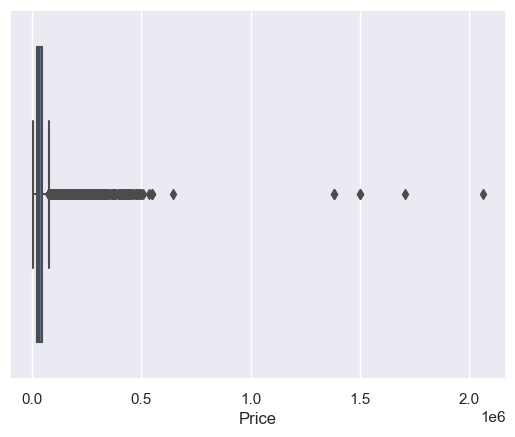

In [119]:
# boxplot for Price 

sns.boxplot(data['Price'])

**Observation:** <br>

Here as you see that we got some values near to 1.5 and 2.0 . So these values are called outliers. Because there are away from the normal values.


Similarly to price we will checking of anothers features.

<AxesSubplot:xlabel='HP'>

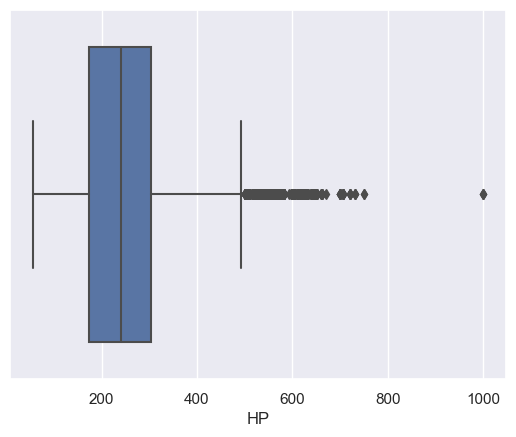

In [120]:
# boxplot for HP

sns.boxplot(data['HP'])

There are outliers we need to remove them from better analysis

In [121]:
data.head()

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,MPG_H,MPG-C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


In [122]:
# getting numeric data

data.select_dtypes(include = [int,float])

,Year,HP,Cylinders,MPG_H,MPG-C,Price
0,2011,335.0,6.0,26,19,46135
1,2011,300.0,6.0,28,19,40650
2,2011,300.0,6.0,28,20,36350
3,2011,230.0,6.0,28,18,29450
4,2011,230.0,6.0,28,18,34500
...,...,...,...,...,...,...
11909,2012,300.0,6.0,23,16,46120
11910,2012,300.0,6.0,23,16,56670
11911,2012,300.0,6.0,23,16,50620
11912,2013,300.0,6.0,23,16,50920


In [123]:
# getting numeric columns name in l
l = list(data.select_dtypes(include = [int,float]).columns)
l

['Year', 'HP', 'Cylinders', 'MPG_H', 'MPG-C', 'Price']

### Removing Outliers using IQR technique

In [124]:
# Q1 and Q2

Q1 = data.quantile(.25)
Q3 = data.quantile(.75)

# interquantile range
IQR = Q3 - Q1

lower = Q1 - (1.5*IQR)
upper = Q3 + (1.5*IQR)

# outliers are below lower and uppper onwards
outliers = (data < lower) | (data > upper)

data1 = data[ ~(outliers).any(axis=1) ] 

In [125]:
data1.shape

(9191, 10)

**Lets check outliers in data and data1**

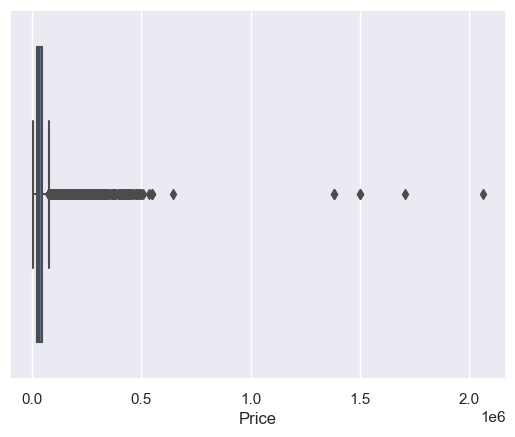

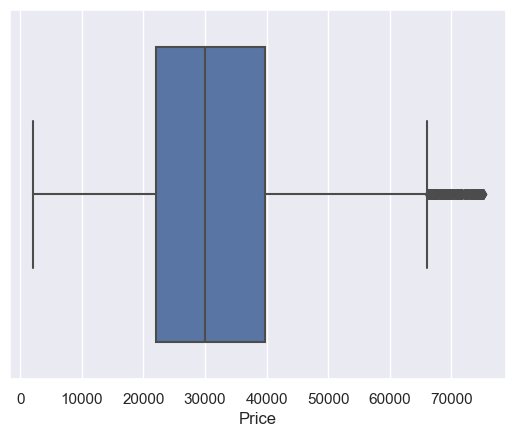

In [126]:
sns.boxplot(data.Price)
plt.show()

sns.boxplot(data1.Price)
plt.show()

In [127]:
print("old data :" , data.shape)
print("new data :" , data1.shape)

old data : (10827, 10)
new data : (9191, 10)


**Outliers are Gone**

## Univariate Analysis

<AxesSubplot:xlabel='HP', ylabel='Density'>

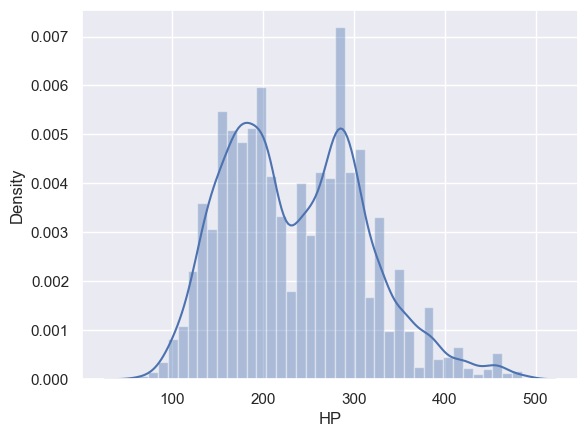

In [128]:
# ploting distplot for HP

sns.distplot(data1.HP)

Most of the cars have 150 to 350 HP

* distplot for all numeric columns stored in l

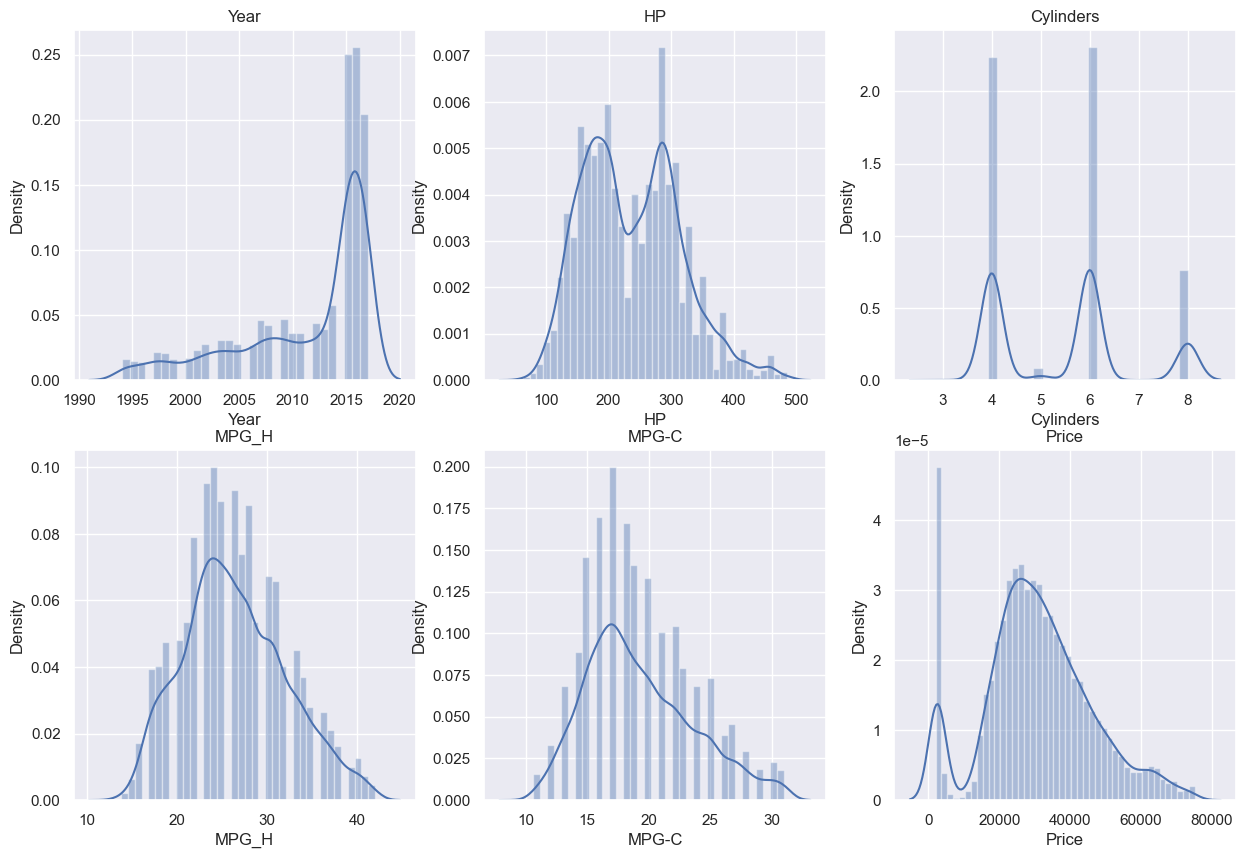

In [129]:
# ploting all graph using subplots

c = 0
plt.figure(figsize=(15,10))
for i in l:
    c = c+1
    plt.subplot(2,3,c)
    sns.distplot(data1[i])
    plt.title(i)
plt.show()

These are the distribution plots from all numerical columns

Text(0.5, 0, 'Number of cars')

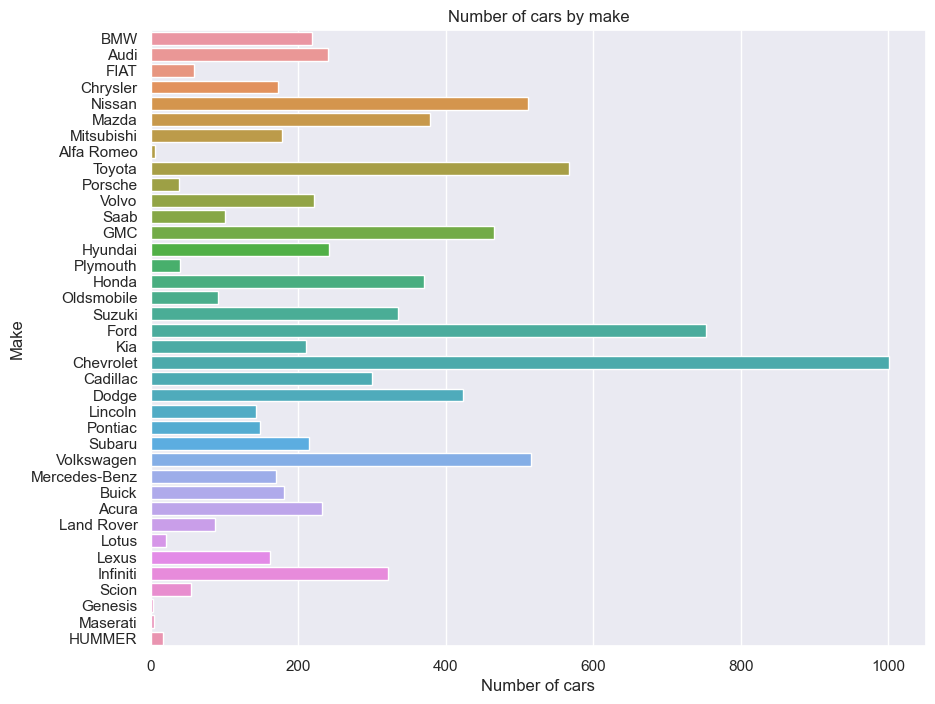

In [130]:
# count plot for num of cars by make

plt.figure(figsize = (10,8))

sns.countplot(y = data1.Make)

plt.title("Number of cars by make")
plt.xlabel('Number of cars')

from above graph we can see that, Chevrolet makes most number of cars

## Bivariate Analysis

In [131]:
# scatter plot 

px.scatter(data_frame = data1, y = 'Price', x = 'HP')


with increase in HP the price too increases

In [132]:
data1.head()

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,MPG_H,MPG-C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


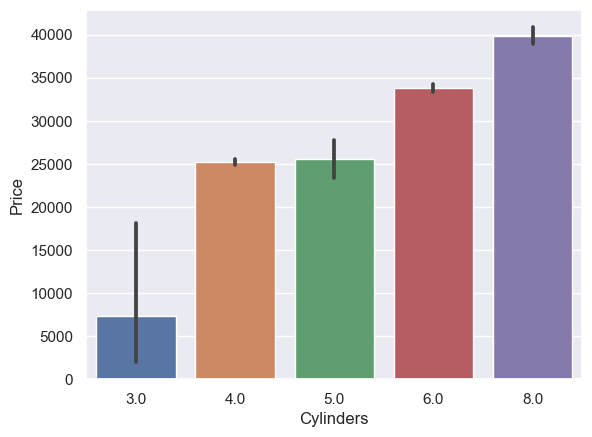

In [133]:
# bar plot between Cylinder and Price

sns.barplot(data = data1, x = 'Cylinders', y = 'Price')
plt.show()

As Number of Cyliners increase The Price also Increases

**Lets see which Make has costly cars and which has cheaper once**

In [134]:
d1 = data1.groupby('Make')['Price'].mean().reset_index(name ='Avg price').sort_values(by ='Avg price')
d1['Avg price'] = round(d1['Avg price'])
d1

,Make,Avg price
28,Plymouth,4361.0
27,Oldsmobile,16153.0
34,Suzuki,18361.0
32,Scion,20263.0
23,Mazda,20496.0
9,FIAT,22237.0
25,Mitsubishi,23040.0
29,Pontiac,23069.0
17,Kia,25403.0
15,Hyundai,25915.0


In [135]:
#ploting horizontal bar graph

px.bar(data_frame=d1, y = 'Make', x = 'Avg price', height = 800 , color = 'Avg price', title = "Avg prices by make(Cars)")

here we see thatplymouth produces cheaper cars while Maserati is much costly

## Multivariate Analysis



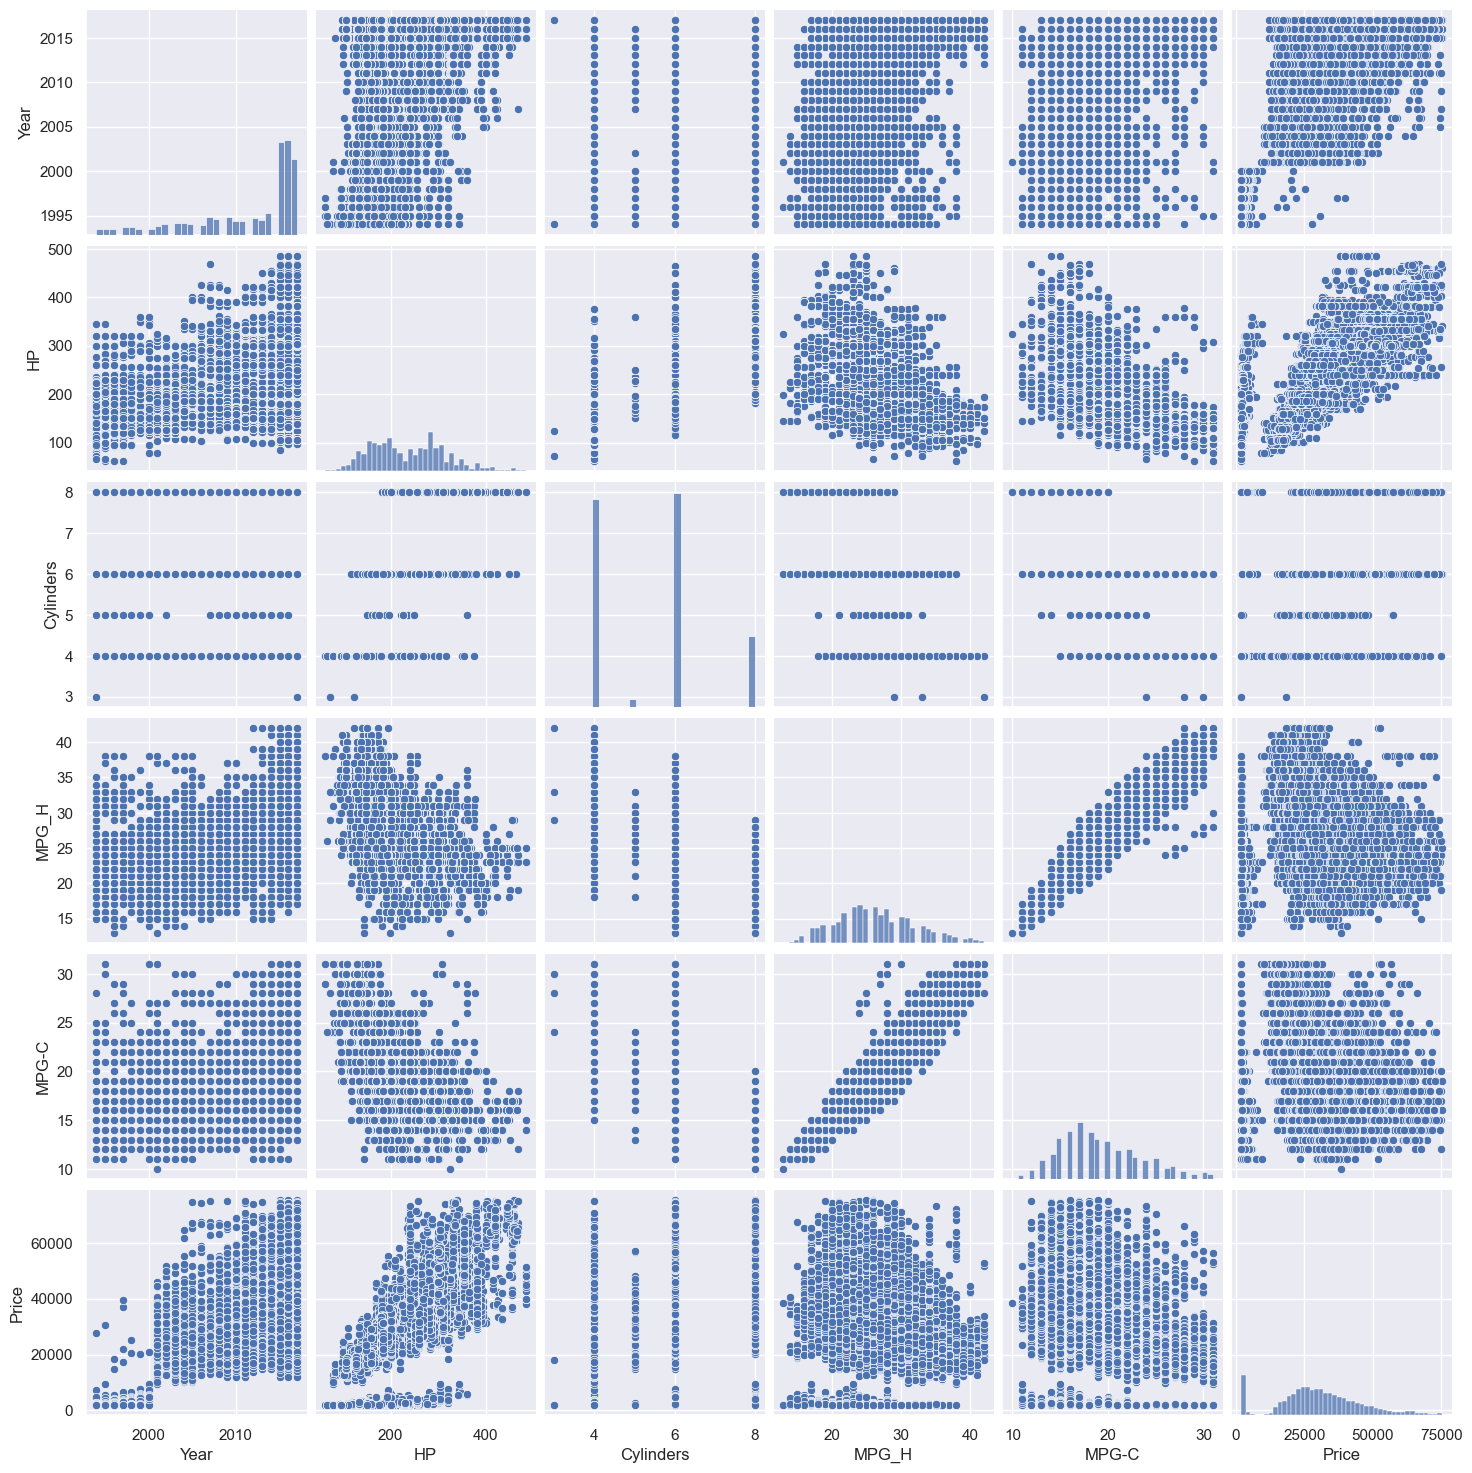

In [136]:
# pairplot

sns.pairplot(data1)

pair plot plots scatter plot for all numerical data in dataframe

In [137]:
# correlation of features of the data 

corr = data1.corr()
corr

,Year,HP,Cylinders,MPG_H,MPG-C,Price
Year,1.000000,0.326726,-0.133920,0.378479,0.338145,0.592983
HP,0.326726,1.000000,0.715237,-0.443807,-0.544551,0.739042
Cylinders,-0.133920,0.715237,1.000000,-0.703856,-0.755540,0.354013
MPG_H,0.378479,-0.443807,-0.703856,1.000000,0.939141,-0.106320
MPG-C,0.338145,-0.544551,-0.755540,0.939141,1.000000,-0.180515
Price,0.592983,0.739042,0.354013,-0.106320,-0.180515,1.000000


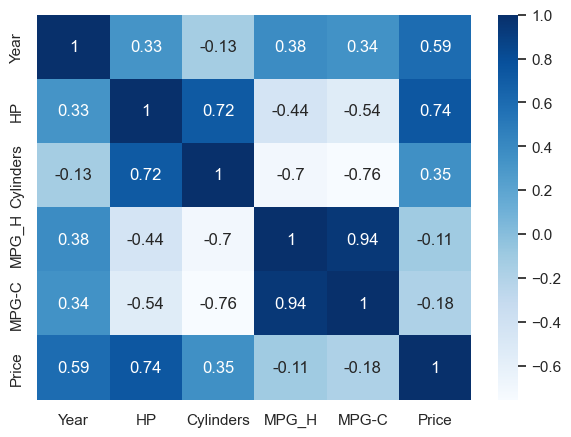

In [138]:
# Heatmap for corelation

plt.figure(figsize = (7,5))
sns.heatmap(data = corr, annot =True , cmap = 'Blues')
plt.show()

There is a high corelation berween HP and Price while negative for MPG

## Thank You